Text(0.5, 1.0, 'One calibration picture')

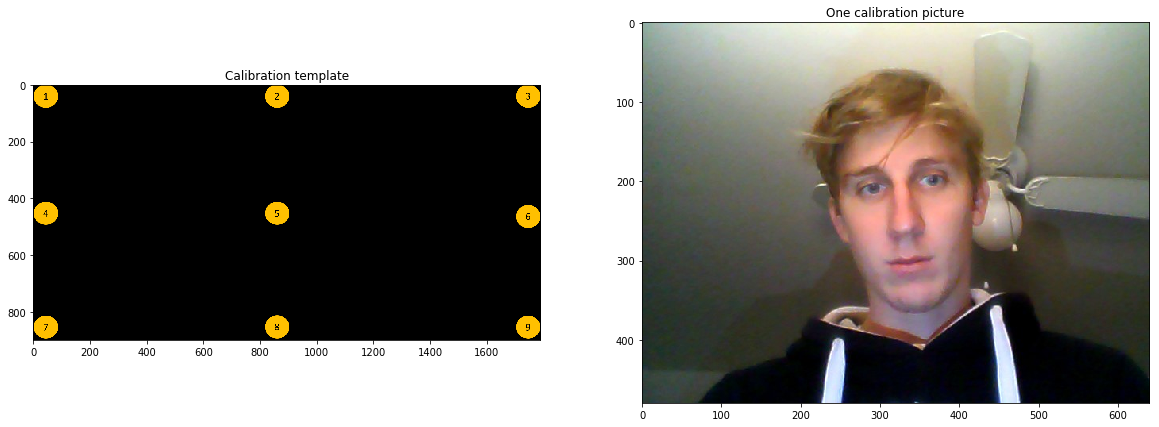

In [98]:
import cv2
import numpy as np
import time
import imutils
from matplotlib import pyplot as plt

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cali = cv2.imread('calibration_pictures/etalonnage.png')
img = cv2.imread('calibration_pictures/3.jpg')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(cali[...,::-1])
plt.title('Calibration template')
plt.subplot(1, 2, 2)
plt.imshow(img[...,::-1])
plt.title('One calibration picture')

In [99]:
# ret, img = cap.read()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
try:
    (x,y,w,h) = faces[0]
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = np.copy(img[y:y+h, x:x+w])
    eyes = eye_cascade.detectMultiScale(roi_gray)
    eyes = [eyes[i] for i in range(len(eyes)) if eyes[i][2]>30] # Trick to avoid mistakes in eye detection

    print(len(eyes))
    (ex,ey,ew,eh) = eyes[0]
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    # Oeil gauche
    eye_g = roi_gray[ey:ey+eh,ex:ex+ew]
except:
    pass

2


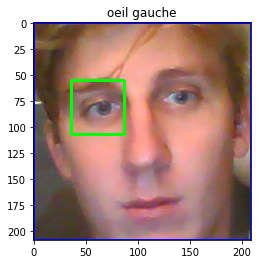

In [100]:
plt.imshow(roi_color[...,::-1])
plt.title('oeil gauche')
plt.show()

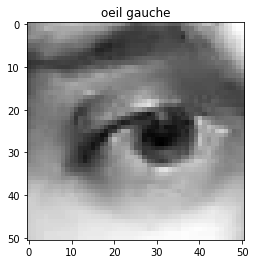

In [101]:
plt.imshow(eye_g, cmap='gray')
plt.title('oeil gauche')
plt.show()

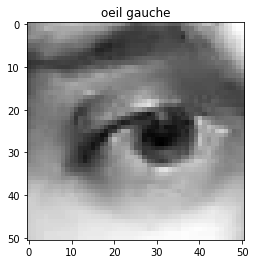

In [102]:
pupilFrame = roi_gray[ey:ey+eh,ex:ex+ew]                                     #Left pupil in color
img2 = roi_color[ey:ey+eh,ex:ex+ew]       
#Extract pupil
windowClose = np.ones((5,5),np.uint8)
windowOpen = np.ones((2,2),np.uint8)
windowErode = np.ones((2,2),np.uint8)
#pupilFrame = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)                     # Convert in gray scale

plt.imshow(pupilFrame, cmap='gray')
plt.title('oeil gauche')
plt.show()

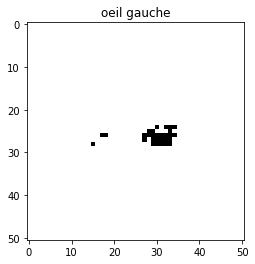

In [103]:
# Threshold to binarize the image into black and white 
# Some improvements can be made here 
tresh = min(pupilFrame.reshape(-1)) + 10
ret, pupilFrame1 = cv2.threshold(pupilFrame,tresh,255,cv2.THRESH_BINARY)   # Convert into black and white image

plt.imshow(pupilFrame1, cmap='gray')
plt.title('oeil gauche')
plt.show()

In [104]:
cnts = cv2.findContours(pupilFrame1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  # Find contours in the image
cnts = cnts[0] if imutils.is_cv2() else cnts[1]                             # Check for compatibility between cv2 and cv3
#cnts = cnts[np.argmax([len(cnts[i]) for i in range(len(cnts))])]            # Take the most 'complicated' contour (supposed to be the pupil)

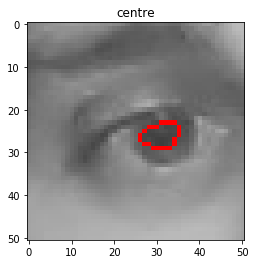

In [107]:
# create hull array for convex hull points
hull = []
cnts = [cnts[i] for i in range(len(cnts)) if (len(cnts[i])>6 and [0,0] not in cnts[i])]
## We try to find which contour is the pupil 
for i in range(len(cnts)):
    # creating convex hull object for each contour and calculate the aspect ratio (width / height)
    hul = cv2.convexHull(cnts[i], False)
    x,y,w,h = cv2.boundingRect(hul)
    aspect_ratio = (float(w)/h)
    hull.append((hul, abs(aspect_ratio-1)))
    
# Select the most perfect circle (it is assumed that it is the pupil)
hull.sort(key=lambda x:x[1])
pupil = hull[0][0]

## Only for demonstration purposes
# Show the result on the actual image
drawing = np.array([[[pupilFrame[i][j],pupilFrame[i][j],pupilFrame[i][j]] for j in range(img2.shape[0])] for i in range(img2.shape[1])])
color = (255, 0, 0) # red - color for convex hull
# draw ith convex hull object
cv2.drawContours(drawing, [pupil], -1, color, 1, 8)
# show the image
plt.imshow(drawing)
plt.title('centre')
plt.show()

X coordinate of the pupil: -2.5 , Y coordinate of the pupil: 1.5


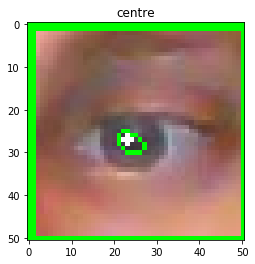

In [88]:
# compute the center of the contour
M = cv2.moments(pupil)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
img2 = roi_color[ey:ey+eh,ex:ex+ew]                                     #Left pupil in color

# Results
print('X coordinate of the pupil:',cX-np.shape(img2)[0]/2, ', Y coordinate of the pupil:',cY-np.shape(img2)[1]/2)

# draw the contour and center of the shape on the image
cv2.drawContours(img2, [pupil], -1, (0, 255, 0), 1)
cv2.circle(img2, (cX, cY), 1, (255, 255, 255), -1)

# show the image
plt.imshow(img2[...,::-1])
plt.title('centre')
plt.show()

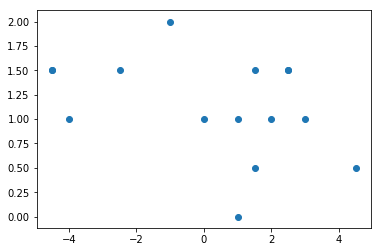

In [109]:
# Import of diverse stuff
import cv2
import numpy as np
import time
import imutils
from matplotlib import pyplot as plt
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')   # detection of a faces
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')                    # detection of eyes

Cx_plot = []
Cy_plot = []
for k in range(1,10):
    img = cv2.imread('calibration_pictures/{}.jpg'.format(k))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    try:
        (x,y,w,h) = faces[0]                             # Selection of only one face
        roi_gray = gray[y:y+h, x:x+w]                    # Selection of the face in gray
        roi_color = np.copy(img[y:y+h, x:x+w])           # Selection of the face in color
        eyes = eye_cascade.detectMultiScale(roi_gray)    # Performing of eye detection
        eyes = [eyes[i] for i in range(len(eyes)) if eyes[i][2]>30] # Trick to avoid mistakes in eye detection
        #Know what eye is what (right : 0 or left : 1) from the face point of view
        eye_list_gray = [0,0] 
        eye_list_color = [0,0] 
        left_right = np.array(eyes)[:,0]                 # Get x position, left eye has a greater x than right eye
        if left_right[0] > left_right[1]:
            for i in range(len(eyes)):
                (ex,ey,ew,eh) = eyes[i]
                ex_g = ex
                eye_list_gray[1-i] = roi_gray[ey:ey+eh,ex:ex+ew]
                eye_list_color[1-i] = roi_color[ey:ey+eh,ex:ex+ew]
        else:
            for i in range(len(eyes)):
                (ex,ey,ew,eh) = eyes[i]
                ex_g = ex
                eye_list_gray[i] = roi_gray[ey:ey+eh,ex:ex+ew]
                eye_list_color[i] = roi_color[ey:ey+eh,ex:ex+ew]

        for i in range(len(eyes)):

            pupilFrame = eye_list_gray[i]
            img2 = eye_list_color[i]
            tresh = min(pupilFrame.reshape(-1)) + 10
            ret, pupilFrame1 = cv2.threshold(pupilFrame,tresh,255,cv2.THRESH_BINARY)   # Convert into black and white image
            cnts = cv2.findContours(pupilFrame1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  # Find contours in the image
            cnts = cnts[0] if imutils.is_cv2() else cnts[1]                             # Check for compatibility between cv2 and cv3
            cnts = [cnts[i] for i in range(len(cnts)) if (len(cnts[i])>6 and [0,0] not in cnts[i])]

            # create hull array for convex hull points
            hull = []

            # calculate points for each contour
            for j in range(len(cnts)):
                # creating convex hull object for each contour and calculate the aspect ratio (width / height)
                hul = cv2.convexHull(cnts[j], False)
                x,y,w,h = cv2.boundingRect(hul)
                aspect_ratio = (float(w)/h)
                hull.append((hul, abs(aspect_ratio-1)))

            # Select the most perfect circle (it is assumed to be the pupil)
            hull.sort(key=lambda x:x[1])
            pupil = hull[0][0]               # Convex Hull boundary of the pupil

            # compute the center of the pupil
            M = cv2.moments(pupil)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            Cx_plot.append(cX-np.shape(img2)[0]/2)
            Cy_plot.append(cY-np.shape(img2)[1]/2)
            
            cv2.circle(img2, (cX, cY), 1, (255, 255, 255), -1)
            cv2.imwrite('{}{}.jpg'.format(k,i), img2)
            drawing = np.array([[[pupilFrame[i][j],pupilFrame[i][j],pupilFrame[i][j]] for j in range(img2.shape[0])] for i in range(img2.shape[1])])
            color = (255, 0, 0) # red - color for convex hull
            # draw ith convex hull object
            cv2.drawContours(drawing, [pupil], -1, color, 1, 8)
            # save the image in result folder
            cv2.imwrite('result/{}{}.jpg'.format(k,i), drawing)
    except:
        pass
plt.scatter(Cx_plot, Cy_plot)
plt.show()